In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      Traceback (most recent call last):
        File "C:\Users\DELL\miniconda3\lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
        File "C:\Users\DELL\miniconda3\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "C:\Users\DELL\miniconda3\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
        File "C:\Users\DELL\miniconda3\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 126, in _parse_requirement_details
          marker = _parse_requirement_marker(
        File "C:\Users\DELL\miniconda3\lib\

In [2]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      1.4.0
altair                       5.0.1
anyio                        3.7.1
appdirs                      1.4.4
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.0.5
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.1.0
Babel                        2.12.1
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       6.0.0
blinker                      1.6.2
boltons                      23.0.0
brotlipy                     0.7.0
cachetools                   5.3.1
category-encoders            2.6.2
certifi                      2023.7.22
cffi                         1.15.1
charset-normalizer           2.0.4
click                        8.1.7
colorama                     0.4.6
comm                         0.1.4
c

In [3]:
import tensorflow as tf
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [5]:
gpus

[]

In [6]:
#Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

Removing Doddy images

In [21]:
import cv2
import imghdr
import matplotlib.pyplot as plt

In [10]:
data_dir = 'data'

In [15]:
os.listdir(os.path.join(data_dir, 'happypeople'))

['05-12-21-happy-people.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '110754-utyeqqosky-1547658396.jpeg',
 '1920px-face-smile.svg_.png.jpg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '2560px-Happy_People.jpg',
 '343515-worldhappinessreport1440.jpg',
 '35438_hd.jpg',
 '427394C200000578-0-image-a-24_1500384481554.jpg',
 '56f455011e0000b300705475.jpeg',
 '7VR73K6EP5ETVEOUFANWBUYJEQ.jpg',
 '89ca5d41335b4f9207b9cf03538a7dbd63497e474912837562cb9f58809ac32f.png',
 '988689_Wallpaper2.jpg',
 '9b65a25adca61c48bcb01370116723e3--happy-people-brings.jpg',
 'A-Group-of-Happy-People-Cartoon-Illustration.jpg',
 'AKPQZvyrG1OQV7XN5OxqNhYjgiijhkrkz9cp-twEy7in420s64-c-mo.jpg',
 'A_Sep20_14_1189155141.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'compassion.jpg',
 'DnHWNwnUcAAXHhF.jpg',
 'dv2051009.jpg',
 'file-20230208-27-3jttof.jpg',
 'friends-happy-190821-1490x838.jpg',
 'friends_190412.jpg',
 'gdfVVm_MyCRtq

In [11]:
image_exts = ['jpeg','jpg','bmp','png']

In [12]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [18]:
img = cv2.imread(os.path.join('data','happypeople','friends_190412.jpg'))

In [19]:
img.shape

(900, 1600, 3)

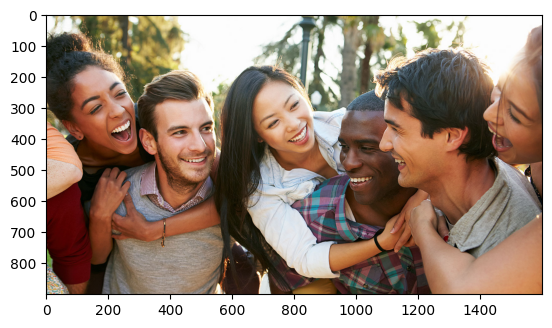

In [25]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [26]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path= os.path.join(data_dir, image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in ext list data\happypeople\2560px-Happy_People.jpg
Image not in ext list data\happypeople\427394C200000578-0-image-a-24_1500384481554.jpg
Image not in ext list data\happypeople\guilherme-stecanella-375176-unsplash.jpg
Image not in ext list data\happypeople\happiness_thumbnail.jpg
Image not in ext list data\happypeople\how-to-watch-shiny-happy-people-64a2f8ea7dc3014582658-900.webp
Image not in ext list data\happypeople\oman-and-diverse-friends-hanging-out-in-a-cafe-together-after-the-2290057229.jpg
Image not in ext list data\happypeople\traitshappypeople.jpg
Image not in ext list data\happypeople\vector.svg
Image not in ext list data\happypeople\vector10.svg
Image not in ext list data\happypeople\vector11.svg
Image not in ext list data\happypeople\vector12.svg
Image not in ext list data\happypeople\vector13.svg
Image not in ext list data\happypeople\vector14.svg
Image not in ext list data\happypeople\vector2.svg
Image not in ext list data\happypeople\vector3.svg
Image not in

Load Data 

In [27]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [28]:
import numpy as np


In [30]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 289 files belonging to 2 classes.


In [31]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [33]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [47]:
batch = data_iterator.next()

In [38]:
# images represented as numpy array
batch[0].shape

(32, 256, 256, 3)

In [48]:
#class 1 = sad, class 0 = Happy people
batch[1]

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1])

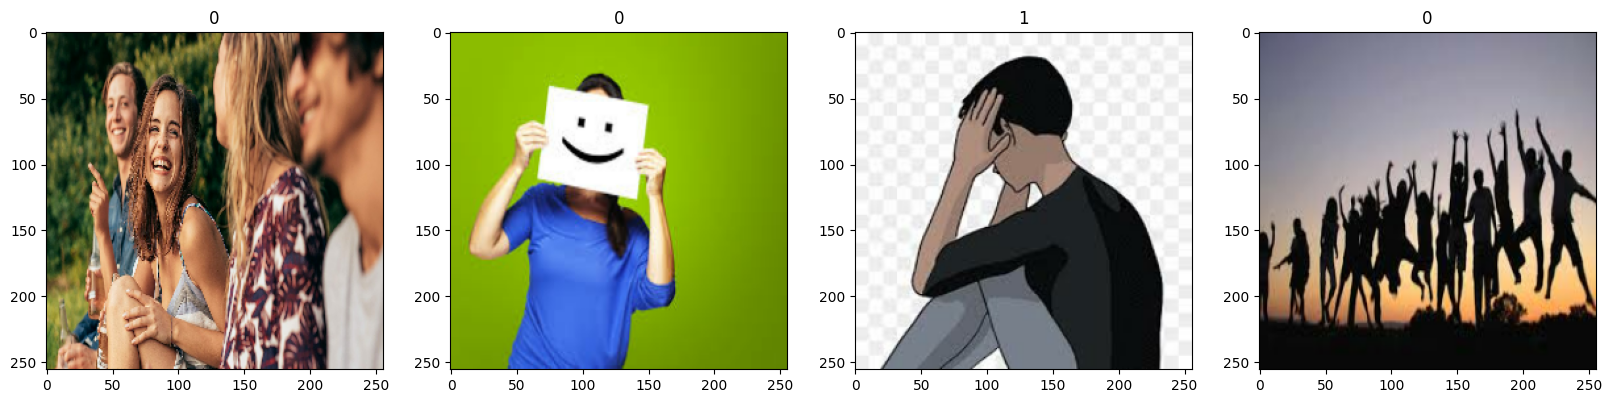

In [49]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [37]:
list(batch)

[array([[[[ 31.111328 ,  35.11133  ,  36.11133  ],
          [ 32.234623 ,  36.234623 ,  37.234623 ],
          [ 34.201347 ,  38.201347 ,  39.201347 ],
          ...,
          [ 44.751415 ,  48.751415 ,  49.751415 ],
          [ 44.462177 ,  48.462177 ,  49.462177 ],
          [ 42.851562 ,  46.851562 ,  47.851562 ]],
 
         [[ 34.55664  ,  38.55664  ,  39.55664  ],
          [ 35.001488 ,  39.001488 ,  40.001488 ],
          [ 35.78035  ,  39.78035  ,  40.78035  ],
          ...,
          [ 34.337177 ,  38.337177 ,  39.337177 ],
          [ 37.569103 ,  41.569103 ,  42.569103 ],
          [ 38.777344 ,  42.777344 ,  43.777344 ]],
 
         [[ 39.742188 ,  43.742188 ,  44.742188 ],
          [ 38.957558 ,  42.957558 ,  43.957558 ],
          [ 37.69033  ,  41.69033  ,  42.69033  ],
          ...,
          [ 32.84893  ,  36.84893  ,  37.84893  ],
          [ 35.84093  ,  39.84093  ,  40.84093  ],
          [ 36.814453 ,  40.814453 ,  41.814453 ]],
 
         ...,
 
         [[ 

Preprocessing of Data

In [53]:
scaled = batch[0]/255
scaled.max()

1.0

In [54]:
data = data.map(lambda x, y: (x/255 , y))

In [58]:
scaled_iterator = data.as_numpy_iterator()

In [61]:
batch = scaled_iterator.next()

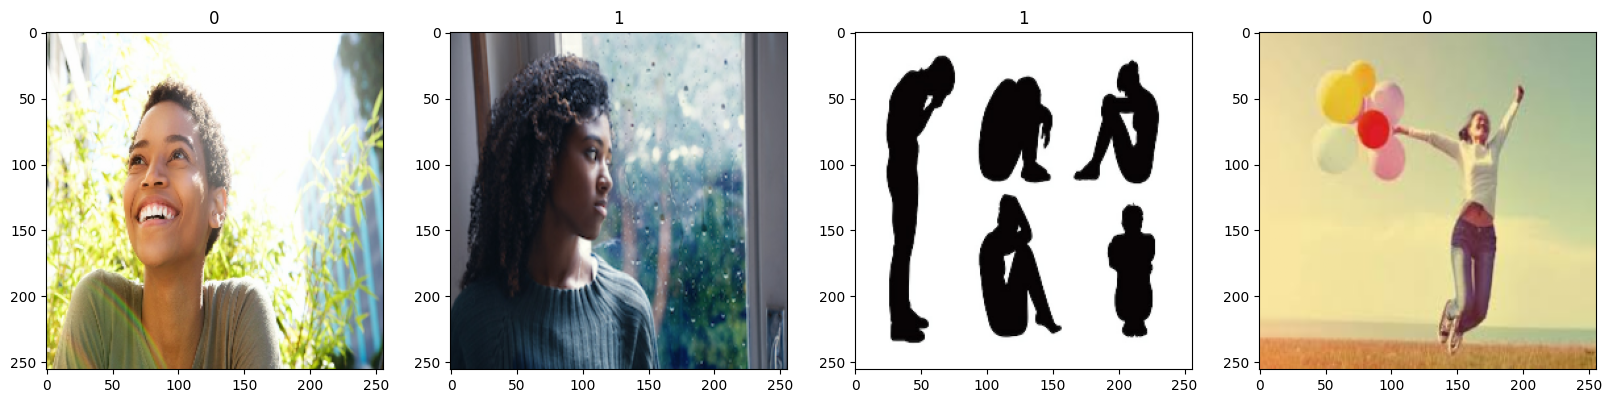

In [63]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [64]:
batch[0].max()

1.0

Split Data

In [65]:
len(data)

10

In [66]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [69]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Build the Deep Learning Model

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten , Dropout

In [72]:
model = Sequential()

In [73]:
model.add(Conv2D(16, (3,3),1 ,activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation= 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation= 'relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [74]:
model.compile('adam', loss= tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [75]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)       

In [76]:
# Train
logdir = 'logs'

In [77]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= logdir)

In [78]:
hist = model.fit(train, epochs= 20, validation_data= val , callbacks= [tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 30s 3s/step - loss: 1.0994 - accuracy: 0.5045 - val_loss: 0.6635 - val_accuracy: 0.5938
Epoch 2/20
7/7 [==============================] - 19s 2s/step - loss: 0.6598 - accuracy: 0.5982 - val_loss: 0.6294 - val_accuracy: 0.7344
Epoch 3/20
7/7 [==============================] - 21s 2s/step - loss: 0.6154 - accuracy: 0.6473 - val_loss: 0.5585 - val_accuracy: 0.7656
Epoch 4/20
7/7 [==============================] - 18s 2s/step - loss: 0.5358 - accuracy: 0.7857 - val_loss: 0.4329 - val_accuracy: 0.8750
Epoch 5/20
7/7 [==============================] - 18s 2s/step - loss: 0.4393 - accuracy: 0.8348 - val_loss: 0.3504 - val_accuracy: 0.9062
Epoch 6/20
7/7 [==============================] - 21s 2s/step - loss: 0.3554 - accuracy: 0.8839 - val_loss: 0.3259 - val_accuracy: 0.8594
Epoch 7/20
7/7 [==============================] - 20s 2s/step - loss: 0.2598 - accuracy: 0.9196 - val_loss: 0.2374 - val_accuracy: 0.9219
Epoch 8/20
7/7 [==================

In [79]:
hist.history

{'loss': [1.0994043350219727,
  0.6598466038703918,
  0.6154492497444153,
  0.535771906375885,
  0.43934401869773865,
  0.3554036319255829,
  0.2598150074481964,
  0.22027404606342316,
  0.17708027362823486,
  0.11176344007253647,
  0.0894513949751854,
  0.07291071116924286,
  0.05367496982216835,
  0.032299283891916275,
  0.023700669407844543,
  0.022321607917547226,
  0.011562724597752094,
  0.015665559098124504,
  0.012705161236226559,
  0.0076921177096664906],
 'accuracy': [0.5044642686843872,
  0.5982142686843872,
  0.6473214030265808,
  0.7857142686843872,
  0.8348214030265808,
  0.8839285969734192,
  0.9196428656578064,
  0.9196428656578064,
  0.9419642686843872,
  0.9776785969734192,
  0.9776785969734192,
  0.9732142686843872,
  0.9910714030265808,
  0.9955357313156128,
  0.9955357313156128,
  0.9955357313156128,
  1.0,
  0.9955357313156128,
  0.9955357313156128,
  0.9955357313156128],
 'val_loss': [0.6635163426399231,
  0.6294292211532593,
  0.558530330657959,
  0.432891130447

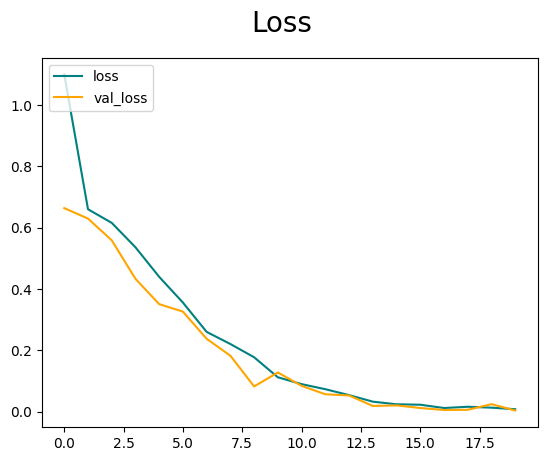

In [80]:
#Plot performance

fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'],color= 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize= 20)
plt.legend(loc = "upper left")
plt.show()

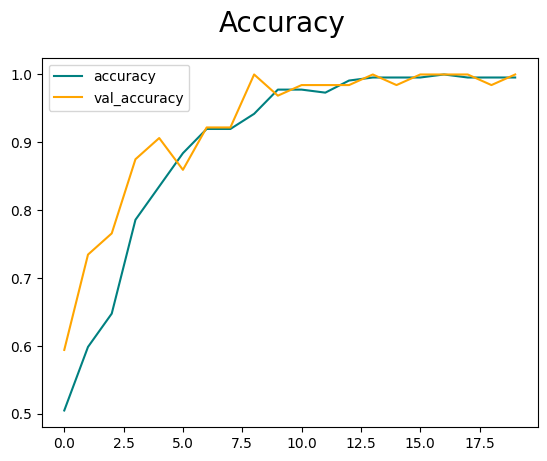

In [81]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'],color= 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize= 20)
plt.legend(loc = "upper left")
plt.show()

Evaluate Performance

In [82]:
# Evaluate
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [83]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [84]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

    

1/1 [==============================] - 4s 4s/step


In [86]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.0, Recall:0.0, Accuracy:1.0


In [87]:
# Test
import cv2


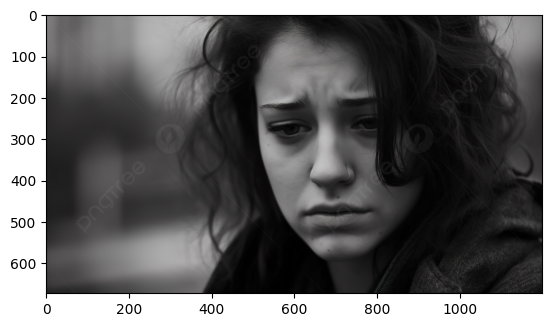

In [99]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

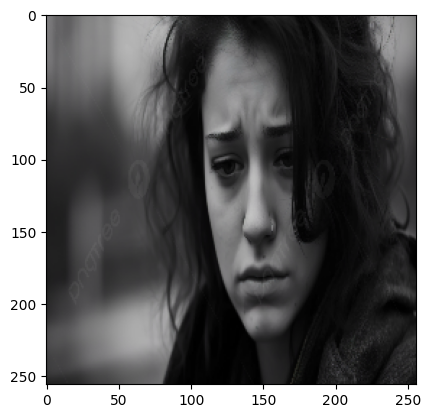

In [100]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [101]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [102]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 2s 2s/step


In [103]:
yhat

array([[0.999669]], dtype=float32)

In [104]:
if yhat >0.5:
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is happy')

Predicted class is sad


Save the model

In [105]:
from tensorflow.keras.models import load_model

In [106]:
model.save(os.path.join('models','happysadmodel.h5'))

c:\Users\DELL\miniconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [107]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))